In [1]:
import pickle
from os import listdir
import matplotlib.pyplot as plt
import numpy as np

In [2]:
DATASET_NAME = "lastfm_asia"

In [3]:
d = dict()

for result_file in listdir(f"results/{DATASET_NAME}/"):
    with open(f"results/{DATASET_NAME}/{result_file}", "rb") as f:
        results = pickle.load(f)
        ss_strategy, cost_fn = result_file.split(".")[0].split("_")
        if cost_fn not in d:
            d[cost_fn] = dict()
        d[cost_fn][ss_strategy] = results

In [4]:
plt.style.use('bmh')

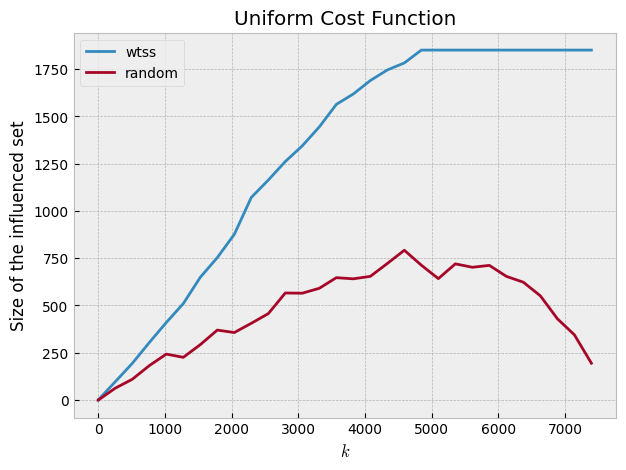

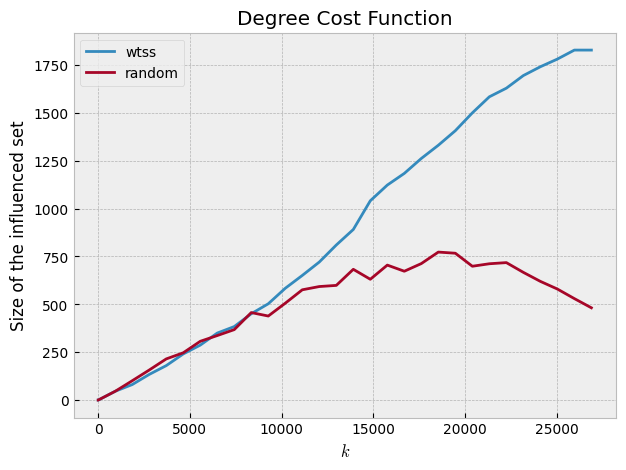

In [7]:
for cost_fn, strategies in d.items():
    fig, ax = plt.subplots(1, 1, figsize=(7, 5))
    for ss_strategy, results in strategies.items():
        ks = results['ks']
        sizes = results['sizes']
        ss_sizes = results['ss_sizes']
        ax.plot(ks, np.array(sizes) - np.array(ss_sizes), label=ss_strategy)
    ax.set_title(f"{cost_fn.title()} Cost Function")
    ax.set_xlabel("$k$")
    ax.set_ylabel("Size of the influenced set")
    ax.legend()
    ax.grid(True)